In [1]:
import pandas as pd
import numpy  as np



In [2]:
data = pd.read_csv('concrete_data.csv')
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:


data.shape

(1030, 9)

In [4]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
target = "Strength"
X = data.copy()
y = X.pop(target)

In [7]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
n_cols      = X.shape[1]
input_shape = (n_cols,)

PART A 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import mean_squared_error

In [12]:

    
X = data.drop(columns=['Strength'])
y = data['Strength']

np.random.seed(42)
tf.random.set_seed(42)

def build_model(input_dim):
    input_layer = Input(shape=(input_dim,))  
    hidden_layer = Dense(10, activation='relu')(input_layer)
    output_layer = Dense(1)(hidden_layer) 
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

test_size = 0.3
num_trials = 50
epochs = 50
seed=330

mse_listA = np.zeros(num_trials)

for i in range(num_trials):
    seed=seed+i*2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
    model = build_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_listA[i]=mse
    if i==0:
        print("Train/test splitting for iteration {}".format(i+1))
        print("Model summary for iteration {}".format(i+1))
        model.summary()
    result = np.sqrt(mean_squared_error(y_test,y_pred))
    print("{}: sqrt(mse) = {}".format(i+1,result))
mean_mseA = np.mean(mse_listA)
std_mseA = np.std(mse_listA)

print("Mean of mean squared errors:", mean_mseA)
print("Standard deviation of mean squared errors:", std_mseA)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train/test splitting for iteration 1
Model summary for iteration 1


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

1: sqrt(mse) = 40.2746559708981
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2: sqrt(mse) = 10.61621623508484
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3: sqrt(mse) = 25.100435108820584
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 14.798840852223675
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5: sqrt(mse) = 10.974704109563822
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6: sqrt(mse) = 59.08465256962935
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7: sqrt(mse) = 11.15454663196632
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 11.197832205918871
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9: sqrt(mse) = 16.758114613449962
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10: sqrt(mse) = 24.350306994829566
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11: sqrt(mse) = 15.592577432189925
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12: sqrt(mse) = 11.882357321577757
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 13.79358228059844
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14: sqrt(mse) = 10.339838373627773
10/10 

PART B

Just normalize,scale the dataset.

In [13]:

    
X = data.drop(columns=['Strength'])
y = data['Strength']

np.random.seed(42)
tf.random.set_seed(42)


def build_model(input_dim):
    input_layer = Input(shape=(input_dim,))  
    hidden_layer = Dense(10, activation='relu')(input_layer)
    output_layer = Dense(1)(hidden_layer) 
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

test_size = 0.3
num_trials = 50
epochs = 50
seed=330

mse_listB = np.zeros(num_trials)

for i in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
    seed=seed+i*2
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_listB[i]=mse
    if i==0:
        print("Train/test splitting for iteration {}".format(i+1))
        print("Model summary for iteration {}".format(i+1))
        model.summary()
    result = np.sqrt(mean_squared_error(y_test,y_pred))
    print("{}: sqrt(mse) = {}".format(i+1,result))
mean_mseB = np.mean(mse_listB)
std_mseB= np.std(mse_listB)

print("Mean of mean squared errors:", mean_mseB)
print("Standard deviation of mean squared errors:", std_mseB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train/test splitting for iteration 1
Model summary for iteration 1


Model: "functional_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_50 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

1: sqrt(mse) = 22.415937148238378
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2: sqrt(mse) = 19.688882598684945
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3: sqrt(mse) = 16.800826299315702
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 17.919097771304997
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5: sqrt(mse) = 20.585323833643873
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6: sqrt(mse) = 17.126416991830823
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7: sqrt(mse) = 18.767363075084372
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 18.365496086834277
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9: sqrt(mse) = 15.105551291517857
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10: sqrt(mse) = 25.80523727515243
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11: sqrt(mse) = 19.89026873798345
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12: sqrt(mse) = 20.055158312223828
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 16.704139049533712
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14: sqrt(mse) = 16.82888368724197
10

PART C

Use 100 epochs to see effect of epochs.

In [14]:

    
X = data.drop(columns=['Strength'])
y = data['Strength']

np.random.seed(42)
tf.random.set_seed(42)

def build_model(input_dim):
    input_layer = Input(shape=(input_dim,))  
    hidden_layer = Dense(10, activation='relu')(input_layer)
    output_layer = Dense(1)(hidden_layer) 
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model
test_size = 0.3
num_trials = 50
epochs = 100
seed=3000

mse_listC = np.zeros(num_trials)

for i in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
    seed=seed+i*2
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_listC[i]=mse
    if i==0:
        print("Train/test splitting for iteration {}".format(i+1))
        print("Model summary for iteration {}".format(i+1))
        model.summary()
    result = np.sqrt(mean_squared_error(y_test,y_pred))
    print("{}: sqrt(mse) = {}".format(i+1,result))

mean_mseC = np.mean(mse_listC)
std_mseC= np.std(mse_listC)

print("Mean of mean squared errors:", mean_mseC)
print("Standard deviation of mean squared errors:", std_mseC)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train/test splitting for iteration 1
Model summary for iteration 1


Model: "functional_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_100 (InputLayer)    │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

1: sqrt(mse) = 12.148549151592942
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2: sqrt(mse) = 14.210315408131999
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3: sqrt(mse) = 12.950024267377906
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 26.790781996359385
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5: sqrt(mse) = 12.92032920099901
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6: sqrt(mse) = 12.727013457763592
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7: sqrt(mse) = 13.229198626287674
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 13.143211055379847
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
9: sqrt(mse) = 12.642007226466074
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10: sqrt(mse) = 13.345708786747801
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11: sqrt(mse) = 12.607054222696819
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12: sqrt(mse) = 12.488242202098432
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 15.258807259458454
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14: sqrt(mse) = 14.124844753788011
10/

PART D

Make model more complex by adding new layers and neurons.

In [15]:

    
X = data.drop(columns=['Strength'])
y = data['Strength']

np.random.seed(42)
tf.random.set_seed(42)

# Define baseline model architecture
def build_model(input_dim):
    input_layer = Input(shape=(input_dim,))  
    hidden_layerI = Dense(10, activation='relu')(input_layer)
    hidden_layerII = Dense(10, activation='relu')(hidden_layerI)
    hidden_layerIII = Dense(10, activation='relu')(hidden_layerII)
    output_layer = Dense(1)(hidden_layerIII) 
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Define parameters
test_size = 0.3
num_trials = 50
epochs = 100
seed=3000

mse_listD = np.zeros(num_trials)

for i in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
    seed=seed+i*2
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = build_model(X_train_scaled.shape[1])
    
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_listD[i]=mse
    if i==0:
        print("Train/test splitting for iteration {}".format(i+1))
        print("Model summary for iteration {}".format(i+1))
        model.summary()
    result = np.sqrt(mean_squared_error(y_test,y_pred))
    print("{}: sqrt(mse) = {}".format(i+1,result))
mean_mseD = np.mean(mse_listD)
std_mseD= np.std(mse_listD)

print("Mean of mean squared errors:", mean_mseD)
print("Standard deviation of mean squared errors:", std_mseD)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train/test splitting for iteration 1
Model summary for iteration 1


Model: "functional_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_150 (InputLayer)    │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_300 (Dense)               │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_301 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_302 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_303 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

1: sqrt(mse) = 9.386377096285443
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2: sqrt(mse) = 9.048401151957657
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3: sqrt(mse) = 7.87793779305273
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 8.159282567229793
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
5: sqrt(mse) = 7.80013855975432
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
6: sqrt(mse) = 9.79858702371011
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7: sqrt(mse) = 9.152898716831116
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8: sqrt(mse) = 7.633628413742236
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9: sqrt(mse) = 8.98725673235292
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step  
10: sqrt(mse) = 11.118694467869032
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11: sqrt(mse) = 10.131743664361467
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12: sqrt(mse) = 7.491678461015715
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13: sqrt(mse) = 8.921974188457027
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
14: sqrt(mse) = 10.91677565197828
10/10 ━━━━━━━━━━━━━━━━━━

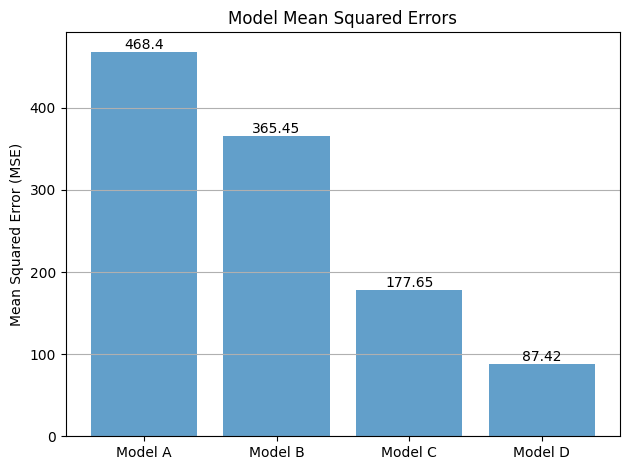

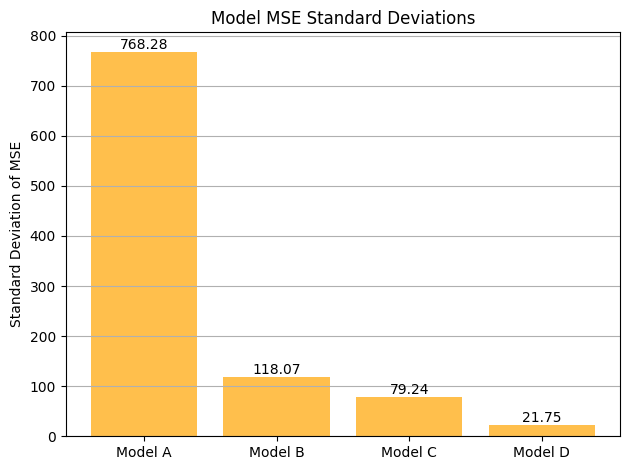

In [16]:
import matplotlib.pyplot as plt

models = ['Model A', 'Model B', 'Model C', 'Model D']
mean_mse_values = [mean_mseA, mean_mseB, mean_mseC, mean_mseD]
std_mse_values = [std_mseA,std_mseB, std_mseC, std_mseD]

# Çubuk grafiği oluşturma için x pozisyonları
x_pos = np.arange(len(models))

# Ortalama Kare Hatalarını Gösteren Grafik
fig, ax = plt.subplots()
bars = ax.bar(x_pos, mean_mse_values, align='center', alpha=0.7, capsize=10)
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_title('Model Mean Squared Errors')
ax.yaxis.grid(True)

# Barların üstüne MSE değerlerini ekleme
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Standart Sapmaları Gösteren Grafik
fig, ax = plt.subplots()
bars = ax.bar(x_pos, std_mse_values, align='center', alpha=0.7, capsize=10, color='orange')
ax.set_ylabel('Standard Deviation of MSE')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_title('Model MSE Standard Deviations')
ax.yaxis.grid(True)

# Barların üstüne Standart Sapma değerlerini ekleme
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

As we can see that, making the model more complex is more reliable and gives us a lower average MSE. Also, epochs have a significant effect on the model's performance and reliability. 

Increasing the model complexity, by adding more layers or neurons, generally enhances its ability to capture underlying patterns in the data, leading to better predictions. However, it's essential to balance complexity to avoid overfitting, where the model performs well on training data but poorly on new, unseen data. 

Similarly, the number of epochs determines how many times the learning algorithm will work through the entire training dataset. While more epochs can improve model accuracy by providing more opportunities for the model to learn, it also increases the risk of overfitting. To mitigate this, techniques such as early stopping and cross-validation can be employed to find the optimal number of epochs.  